# Lecture 5: August 16th, 2023

__Reminders:__ 

* Quizzes for 6 different EDA outcomes have been posted. I'll show you on Canvas how to check your progress.
    * Remember: You only need to get credit for an outcome once. For example, if you pass P1 this week, you do not need to take it again for the rest of the class.

    * We will see quizzes for the remaining 4 EDA outcomes next week. I will also give new attempts for the quizzes you try this week.

* Homework 1 and Homework 2 are due tonight at midnight. Homework 3 and Homework 4 will be posted tonight. (Homework 3 is already in Deepnote, and if we have some time at the end of lecture today we'll work on it; or you could use the time to finish the homework due tonight.)

* Office hours yesterday were lots of fun! As a reminder, Anthony has office hours tomorrow from 2:00pm-4:00pm.

* For those of you who watch videos instead of attending live lecture: the videos for today are recorded and uploaded, I just haven't posted them in the notes yet. This will be done after lecture today.

__Today:__ 
* Start EDA Unit 3! This is all about plotting for Data Science.
    * We still have a little bit of material left over from EDA Unit 2. I have asked Anthony to go over the remaining material in discussion today. Be sure to attend! (I also have the notes for this material posted in Lecture 4.)


## Introduction to plotting based on "The Grammar of Graphics"

Here, we will take a little field trip...

...to the iPad! Here are the notes we took.

![Teaching-38.jpg](Teaching-38.jpg)

![Teaching-39.jpg](Teaching-39.jpg)

![Teaching-40.jpg](Teaching-40.jpg)

![Teaching-41.jpg](Teaching-41.jpg)

![Teaching-42.jpg](Teaching-42.jpg)

## Introduction to Seaborn and the "mpg" dataset

We start with Seaborn because it has a number of built-in datasets that are very nice to work with.

In [19]:
import seaborn as sns

Here's how we can look at all of the different datasets Seaborn gives us access to.

In [20]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

* Load the "mpg" dataset from the Seaborn library.

In [21]:
df = sns.load_dataset("mpg")

Already we can see that `df` is a much smaller dataset than much of what we've worked with before (think about the taxis dataset, with over 6000 rows).

In [22]:
df.shape

(398, 9)

In [23]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,23.0,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
210,19.0,6,156.0,108.0,2930,15.5,76,japan,toyota mark ii
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
377,31.0,4,91.0,68.0,1970,17.6,82,japan,mazda glc custom


* How many "origin" values are in this datset?

In [24]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [25]:
#Not telling me the distinct origins
len(df["origin"])

398

In [26]:
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [27]:
len(df["origin"].unique())

3

Warning: `unique` is a Series method, but not a DataFrame method.

In [28]:
df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [29]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [30]:
type(df["origin"].value_counts())

pandas.core.series.Series

Notice that if I sum up these values, I get the number of rows in `df`.

In [31]:
df["origin"].value_counts().sum()

398

* How does the average weight of a car differ across these origins? Use the DataFrame method `groupby` (this will be our first time seeing `groupby`).

In [32]:
df.groupby("origin")

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [34]:
df.groupby("origin").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [35]:
df.groupby("origin").mean()["weight"]

origin
europe    2423.300000
japan     2221.227848
usa       3361.931727
Name: weight, dtype: float64

* Can you calculate that same average weight for "europe" using Boolean indexing?

In [36]:
df[df["origin"] == "europe"]["weight"].mean()

2423.3

...`.loc[:,"weight"]`

In [37]:
#reminder about loc versus iloc
df2 = df.sample(5)
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
154,15.0,6,250.0,72.0,3432,21.0,75,usa,mercury monarch
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
310,38.1,4,89.0,60.0,1968,18.8,80,japan,toyota corolla tercel
187,17.5,8,305.0,140.0,4215,13.0,76,usa,chevrolet chevelle malibu classic
251,20.2,8,302.0,139.0,3570,12.8,78,usa,mercury monarch ghia


In [39]:
df2.loc[154,"mpg"]

15.0

In [40]:
df2.iloc[0,0]

15.0

<font color = red> Motivating Question: </font> Think about how you would analyze how mpg changes based on weight? At this point, we haven't really seen an easy way to do this just with pandas...

## Visualizing the data using Altair

In [41]:
import altair as alt

To make visualizations, we encode columns in the dataset to various visual channels

In [42]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* Using Altair, plot "weight" versus "mpg" using a scatter plot. Encode the "weight" column in the x-coordinate, and the "mpg" column in the y-coordinate.

In [43]:
alt.Chart(df).mark_circle()

alt.Chart(...)

Question: Do we need capital "C" in "Chart?

In [44]:
alt.chart(df).mark_circle()

AttributeError: module 'altair' has no attribute 'chart'

What's going on? All we've specified is that the data we want comes from `df`. We haven't told Altair what variables correspond to which parts of the chart.

Let's start by specifying what the x-axis should hold.

Warning: Be careful with capitalization and spelling of variable (column) names. If they do not match exactly, there will be an error.

In [45]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [46]:
alt.Chart(df).mark_circle().encode(
    x="weight"
)

alt.Chart(...)

In [47]:
alt.Chart(df).mark_circle().encode(
    x="weight",
    y="mpg"
)

alt.Chart(...)

* Add a color channel to the chart, encoding the “origin” value.

In [48]:
alt.Chart(df).mark_circle().encode(
    x="weight",
    y="mpg",
    color="origin"
)

alt.Chart(...)

* Add a tooltip to the chart, including the weight, mpg, origin, model year, and the name of the car.

In [50]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [49]:
alt.Chart(df).mark_circle().encode(
    x="weight",
    y="mpg",
    color="origin",
    tooltip = ["weight","mpg","origin","model_year","name"]
)

alt.Chart(...)

## Visualizing the data using Seaborn and Plotly

Main Points:
 1.) I will show you these libraries exist
 2.) I will show you the basic syntax - appreciate how similar it is to Altair


* Make a similar chart (xy-axes, color, but not tooltip) using Seaborn.

In [51]:
import seaborn as sns

<AxesSubplot:xlabel='weight', ylabel='mpg'>

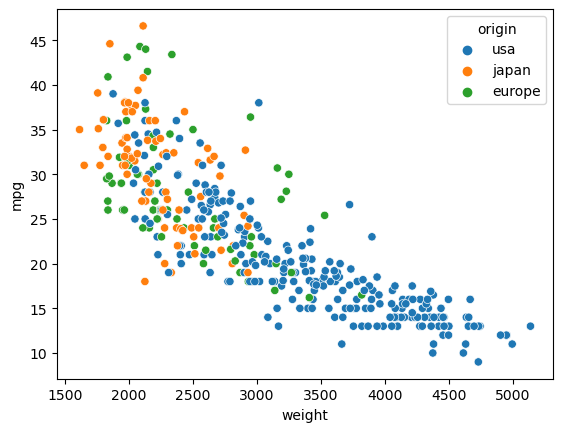

In [52]:
sns.scatterplot(
    data=df,
    x="weight",
    y="mpg",
    hue="origin"
)

* Make a similar chart with Plotly Express.

In [53]:
import plotly.express as px

In [55]:
px.scatter(
    data_frame=df,
    x="weight",
    y="mpg",
    color="origin"
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=223b9534-577a-4222-9ad1-2a1791b08931' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>